# Final Project: Logistic Regression, Neural Network, and Application

Whitney Brannen, Jimmy Nguyen, Lydia Holley, Jenny Gilby

--------------

### 1. Implement a Python class to execute gradient descent-based logistic regression for classification. Use ∆J = 0.00001 as the stopping criterion. Use setosa and virginica in the iris dataset for writing and debugging your code.

In [1]:
### import needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

import os
import sys

from scipy.stats import f
import matplotlib.patches as mpatches
import seaborn as sns

#### Question 1: from scratch logistic regression

In [2]:
### logistical regression class for classification
class MyLogisticRegression:
    
    # initialize self, learning rate, iterations, and delta J
    def __init__(self, learning_rate=0.01, max_iters=10000, delta_J=0.00001):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.delta_J = delta_J
        self.theta = None
        self.mean = None
        self.std = None
        self.standardized_X = None
    
    # standardize the data
    def standardize(self, X):        
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        self.standardized_X = (X - self.mean) / self.std
        
        return self.standardized_X
    
    # find sigmoid value
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    # find cost
    def cost_function(self, X, y, theta):
        m = len(y)
        h = self.sigmoid(np.dot(X, theta))
        log_term_1 = np.log(h)
        log_term_2 = np.log(1 - h + 1e-10) # add constant to avoid dividing by 0 error

        J = (-1 / m) * (np.dot(y.T, log_term_1) + np.dot((1 - y).T, log_term_2))
        return J

    # perform gradient descent
    def gradient_descent(self, X, y, theta):
        m = len(y)
        h = self.sigmoid(np.dot(X, theta))
        gradient = (1 / m) * (np.dot(X.T, (h - y)))
        return gradient

    # machine learning section
    def fit(self, X, y):
        #standardize
        X = self.standardize(X)
        
        #initialize values
        X = np.insert(X, 0, 1, axis=1)  # Add a bias term
        m, n = X.shape
        self.theta = np.zeros(n)

        # set previous cost to infinity
        # find the delta J values until stop criteria is met
        prev_cost = float('inf')
        for i in range(self.max_iters):
            gradient = self.gradient_descent(X, y, self.theta)
            self.theta -= self.learning_rate * gradient

            current_cost = self.cost_function(X, y, self.theta)

            if abs(prev_cost - current_cost) < self.delta_J:
                print(f"Converged after {i+1} iterations.")
                break

            prev_cost = current_cost

        if i == self.max_iters - 1:
            print("Warning: Maximum number of iterations reached without convergence.")

    # predict method
    def predict(self, X):
        #standardize
        X = self.standardize(X)
        
        X = np.insert(X, 0, 1, axis=1)  # Add a bias term
        predictions = self.sigmoid(np.dot(X, self.theta))
        return (predictions >= 0.5).astype(int)

In [3]:
# function to plot the decision boundary
def plot_decision_boundary(X, y, model, title, class_names, label_names):
    h = .02  # Step size in the mesh
           
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X = (X - mean) / std
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[0.5], colors='black')

    for i in np.unique(y):
        plt.scatter(X[y == i, 0], X[y == i, 1], edgecolors='k', marker='o', label=class_names[i])
        
    plt.title(title)
    plt.xlabel(label_names[0])
    plt.ylabel(label_names[2])
    plt.legend()
    plt.show()

In [4]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convert to a binary classification task (class 0 vs. class 2)
binary_mask = (y == 0) | (y == 2)
X = X[binary_mask, 2: ]  # Select petal features (cols 3 and 4)
y = y[binary_mask]

# change classification from 2 to 1 for test data because it does not go through standardization
y[y == 2] = 1

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Converged after 2518 iterations.
Accuracy: 1.0
Y pred: [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
Y test: [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]


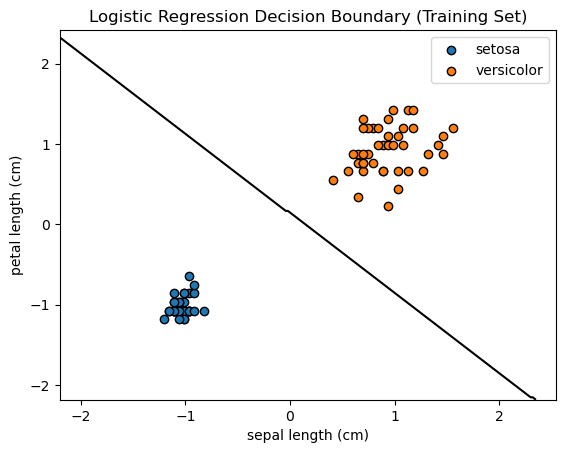

In [5]:
# Create a logistic regression model
model = MyLogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Y pred: {y_pred}\nY test: {y_test}")

# Plot decision boundary
plot_decision_boundary(X_train, y_train, model, 'Logistic Regression Decision Boundary (Training Set)', iris.target_names, iris.feature_names)


#### compared to sklearn

In [6]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convert to a binary classification task (class 0 vs. class 2)
binary_mask = (y == 0) | (y == 2)
X = X[binary_mask, 2: ]  # Select petal features (cols 3 and 4)
y = y[binary_mask]

# change classification from 2 to 1 for test data because it does not go through standardization
y[y == 2] = 1

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 1.0
Y pred: [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
Y test: [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]


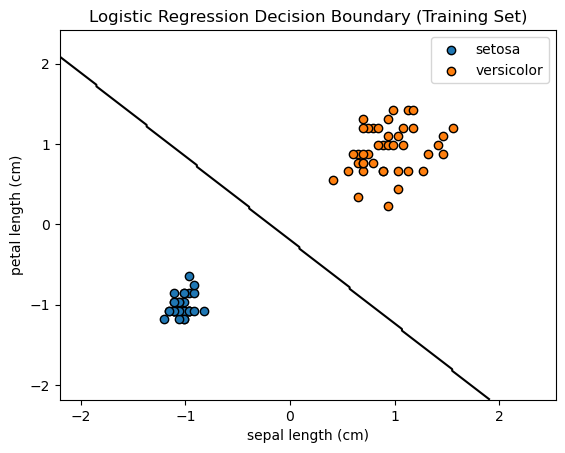

In [7]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(f"Y pred: {y_pred}\nY test: {y_test}")

# Plot decision boundary
plot_decision_boundary(X_train, y_train, model, 'Logistic Regression Decision Boundary (Training Set)', iris.target_names, iris.feature_names)


-----

### 2. Implement a Python class to execute forward propagation and back propagation for the following neural network architecture:

#### our neural network and testing it on iris data

In [8]:
# neural network class
class MyNeuralNetwork:
    # initialize values
    def __init__(self,x,y,learning_rate,iters):
        np.random.seed(100)  
        
        self.x = x
        
        # standardize the data       
        self.mean = np.mean(self.x, axis=0)
        self.std = np.std(self.x, axis=0)
        self.input = (self.x - self.mean) / self.std

        self.theta_1 = np.random.rand(self.input.shape[1],2) 
        self.theta_2 = np.random.rand(2, 1)              
        self.y = y
        self.output = np.zeros(self.y.shape)
        self.learning_rate = learning_rate
        self.iters = iters
        self.cost = []
        self.bias = 1
        
    
    # sigmoid method   
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    # find sigmoid derivative
    def sigmoid_derivative(self, x): 
        return x * (1 - x)

    # find the cost
    def cost_function(self, target, output):
        return 0.5 * np.sum(np.square(np.subtract(target, output)))
    
    # forward propogation method
    def forward_prop(self):
        self.layer1 = self.sigmoid(np.dot(self.input, self.theta_1) + self.bias)
        self.output = self.sigmoid(np.dot(self.layer1, self.theta_2) + self.bias)
    
    # backward propogation method
    def backward_prop(self):
        # application of the chain rule to find derivative of the cost function with respect to weights2 and weights1
        deriv_theta_2 = np.dot(self.layer1.T, ((self.y - self.output) * self.sigmoid_derivative(self.output)))
        deriv_theta_1 = np.dot(self.input.T, (np.dot((self.y - self.output) * self.sigmoid_derivative(self.output), self.theta_2.T) * self.sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the cost function
        self.theta_1 += self.learning_rate * deriv_theta_1
        self.theta_2 += self.learning_rate * deriv_theta_2    
    
    # training method for the data utilizing forward and back propogation
    def train(self):
        for i in range (self.iters):
            self.forward_prop()
            self.backward_prop()
            
            self.cost.append(self.cost_function(self.y, self.output))
    
    # predict method to predict classification
    def predict(self,input_data):
        mean = np.mean(input_data, axis=0)
        std = np.std(input_data, axis=0)
        self.input = (input_data - mean) / std
        
        self.forward_prop()
        return np.round(self.output)

In [9]:
# load iris data
iris = load_iris()

# create array with iris data for X values
iris.data = pd.DataFrame(iris.data).iloc[:, 0:2]
iris.data = pd.concat([iris.data.head(50), iris.data.tail(50)])
X = np.array(iris.data)

# create array with iris data for y classifications
iris.target = pd.DataFrame(iris.target)
iris.target = pd.concat([iris.target.head(50), iris.target.tail(50)])
iris.target = iris.target.replace(2, 1)
y = np.array(iris.target)

In [10]:
# make a training and testing set of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# call our neural network class and train the data
nn = MyNeuralNetwork(x=X_train,y=np.array(y_train),learning_rate=0.3,iters=2000)
nn.train()

# produce predictions
y_pred = nn.predict(X_test).astype(int)

print(f"Accuracy of our testing set: {accuracy_score(y_pred, y_test)* 100:.2f}%")

Accuracy of our testing set: 100.00%


In [12]:
# print the predicted and test data to compare
print(np.ravel(y_pred))
print(np.ravel(y_test))

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]


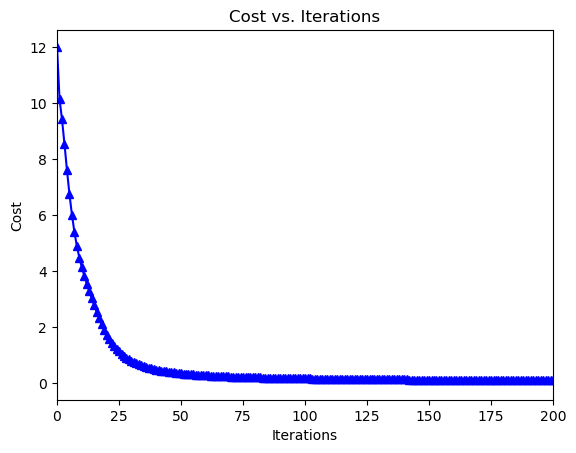

In [13]:
# plot cost vs. iterations
iters = []

for i in range(0, len(nn.cost)):
    iters.append(i)
    
plt.plot(iters, nn.cost, marker = '^', color = 'blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title("Cost vs. Iterations")
plt.xlim((0, 200))
plt.show()

#### compare to sklearn

In [14]:
# Training the Model

# creating an classifier from the model:
mlp = MLPClassifier(solver='lbfgs', activation = 'logistic', alpha=1e-5, hidden_layer_sizes=(1), random_state=1)

# let's fit the training data to our model
mlp.fit(X_train, np.ravel(y_train))

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=1,
              random_state=1, solver='lbfgs')

In [15]:
# make predictions with sklearn
# print the accuracy of predicted training and test data
y_pred_test_sk = mlp.predict(X_test)

print(f"Accuracy on the sklearn testing set: {accuracy_score(y_pred_test_sk, y_test)* 100:.2f}%")
print(f"Accuracy of our testing set: {accuracy_score(y_pred, y_test)* 100:.2f}%")

Accuracy on the sklearn testing set: 100.00%
Accuracy of our testing set: 100.00%


In [16]:
# print predicted and test values to compare

print(np.ravel(y_pred_test_sk))
print(np.ravel(y_test))

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]


-------

### 3. Apply the python scripts that you have written for PCA, linear regression, logistic regression, and ANN to the heart disease dataset at the UCI Machine Learning Repository and describe what you could find about the data. Use Jupyter notebook to show both your code and plots. Apply kmeans and hiararchical clustering in sklearn to the data as well.

#### First input the PCA and Linear Regression Classes

In [17]:
# create the PCA class
class myPCA:
    
    def __init__(self, data, num_components):
        # two inputs, one is the data and the other is the number of PCAs desired
        # initialize variables

        self.data = data
        self.num_components = num_components
        
        self.eigenvectors = None
        self.eigenvalues = None
        self.data_mean = None
        self.new_data = None
        self.projected = None
        self.pcnt_var = None
        self.variance = None
        self.std = None
    
    # fit data to model
    def my_fit(self):
        # do mean centering and standardize
        self.data_mean = np.mean(self.data,axis=0)
        self.std = np.std(self.data, axis=0)
        self.new_data = (self.data - self.data_mean)/self.std
        
        # compute covariance matrix using numpy.cov()
        # for np.cov the columns need to be samples, so transpose the data
        cov_matrix = np.cov(self.new_data.transpose()) 
        
        # perform eigendecomposition using np.linalg.eig()
        eigenvalues,eigenvectors = np.linalg.eigh(cov_matrix)
        
        # sort eigenvectors and eigenvalues for the PCA
        eigenvectors = eigenvectors.transpose()
        index = np.argsort(eigenvalues)[::-1]
        eigenvalues_sorted = eigenvalues[index]
        eigenvectors_sorted = eigenvectors[index]
        
        #store first num_components eigenvectors and eigenvalues
        self.eigenvectors = eigenvectors_sorted[0:self.num_components]
        self.eigenvalues = eigenvalues_sorted[0:self.num_components]
    
    # transorm the data with the model
    def my_transform(self):
        #project the data onto the principle components of the number of components
        self.projected = np.dot(self.new_data,self.eigenvectors.transpose())
        return self.projected
    
    def my_fit_transform(self):
        # combine fit and transform methods to be able to do all at once
        # do mean centering
        self.data_mean = np.mean(self.data,axis=0)
        self.new_data = self.data - self.data_mean
        
        # compute covariance matrix using numpy.cov()
        #row = 1 sample, column = feature
        cov_matrix = np.cov(self.new_data.transpose()) #this function needs column to be a sample
        
        # perform eigendecomposition
        eigenvalues,eigenvectors = np.linalg.eigh(cov_matrix)
        
        # sort eigenvectors for the PCA
        eigenvectors = eigenvectors.transpose()
        index = np.argsort(eigenvalues)[::-1]
        eigenvalues_sorted = eigenvalues[index]
        eigenvectors_sorted = eigenvectors[index]
        
        #store first n eigenvectors and eigenvalues
        self.eigenvectors = eigenvectors_sorted[0:self.num_components]
        self.eigenvalues = eigenvalues_sorted[0:self.num_components]
        
        #project our data
        self.projected = np.dot(self.new_data,self.eigenvectors.transpose())
        return self.projected
    
    # variance method
    def my_var(self):
        # return the variance
        self.variance = np.var(self.projected, axis=0)
        return f'Variance Explained: {list(self.variance)}'
    
    # percent variance method
    def my_pct_var(self):
        # return the percent variance explained by each PC by finding percent of total eigenvalues
        total_eigenvalues = sum(self.eigenvalues)
        pct_variance = []
        for i in self.eigenvalues:
            pctVar = (i/total_eigenvalues)*100
            pct_variance.append(pctVar)
            
        self.pcnt_var = pct_variance           
        return f'Percent Variance Explained: {pct_variance}'
    
    # scores method
    def my_scores(self):
        # return the scores, which is the data projected onto the principle components
        return self.projected
    
    # loadings method
    def my_loadings(self):
        # return the loadings, which is the eigenvectors
        return self.eigenvectors

In [18]:
# class for multivariate linear regression
class MultivariateLinearRegression:
    # initialize variables
    def __init__(self, learning_rate=0.01, num_iterations=1000):       
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None
        self.intercept = None
        self.mean = None
        self.std = None
        self.standardized_X = None
        self.cost_history = None
    
    # standardize the data
    def standardize(self, X):        
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        self.standardized_X = (X - self.mean) / self.std
        
        return self.standardized_X
    
    # cost function method
    def cost_function(self, X, y, theta):       
        m = len(y)
        predictions = np.dot(X, theta)
        error = predictions - y
        cost = (1 / (2 * m)) * np.sum(error**2)
        
        return cost

    # gradient descent method
    def gradient_descent(self, X, y):       
        m, n = X.shape
        self.theta = np.zeros(n)
        self.intercept = 0
        self.cost_history = []

        for _ in range(self.num_iterations):
            # Calculate predictions
            predictions = np.dot(X, self.theta) + self.intercept

            # Calculate errors
            errors = predictions - y

            # Update thetas and intercept using gradient descent
            self.theta -= (self.learning_rate / m) * np.dot(X.T, errors)
            self.intercept -= (self.learning_rate / m) * np.sum(errors)
            
            cost = self.cost_function(X, y, self.theta)
            self.cost_history.append(cost)
            
        return self.cost_history
    
    # fit method to train data to model
    # predict method to transorm data to model
    def fit_predict(self, X, y):
        # Standardize the features/ X values/ dependent variables 
        X = self.standardize(X)

        # Add a column of ones for the intercept term
        X = np.c_[np.ones(X.shape[0]), X]

        # Perform gradient descent
        self.gradient_descent(X, y)

        # predict
        predictions = np.dot(X, self.theta) + self.intercept
        
        # return predicted y values 
        return predictions    
    
    # plot method for convergence v cost function
    def plot_convergence(self):
        plt.plot(range(1, self.num_iterations + 1), self.cost_history, color='blue')
        plt.rcParams["figure.figsize"] = (10, 6)
        plt.grid()
        plt.xlabel('Number of Iterations')
        plt.ylabel('Cost')
        plt.title('Convergence of Cost Function')
        plt.show()
          

#### read in the dataset

In [19]:
### read in data and drop ? fields
heart_disease = pd.read_csv("processed.cleveland.data",header=None)
heart_disease = heart_disease[heart_disease != "?"]
hd = heart_disease.dropna()
hd = hd.astype(float)

X = hd.iloc[:,0:13].values
y = hd.iloc[:,13].astype(int).values

for i in range(len(y)):
    if y[i] != 0:
        y[i] = 1

#### Run data through PCA class and produce graphics

In [20]:
# data for numpy
PCAdata = X

In [21]:
# call PCA class
num_components = min(PCAdata.shape[0],PCAdata.shape[1])
pca = myPCA(PCAdata,num_components)

projected = pca.my_fit_transform()
pctVar = pca.my_pct_var()
var = pca.my_var()
loadings = pca.my_loadings()
scores = pca.my_scores()

In [22]:
# find the index for negative and positive for heart disease values
# store indexes in lists
negHD = []
posHD = []

count = 0

for row in y:
    count += 1
    
    if row == 0.0:
        negHD.append(count-1)
        
    else:
        posHD.append(count-1)

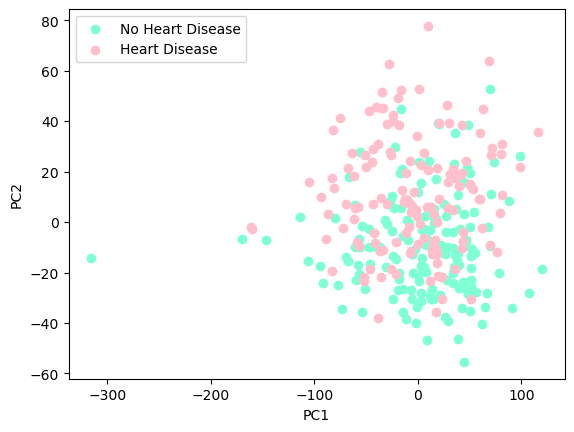

In [23]:
# plot the scores plot

y1 = scores[:,0]
y2 = scores[:,1]

plt.scatter(y1[negHD], y2[negHD], color='aquamarine', label = 'No Heart Disease')
plt.scatter(y1[posHD], y2[posHD], color='pink', label = 'Heart Disease')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'upper left')
plt.show()

/var/folders/n6/gbphvvd12sq8410bcnt0m5pc0000gn/T/ipykernel_19559/1273523138.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


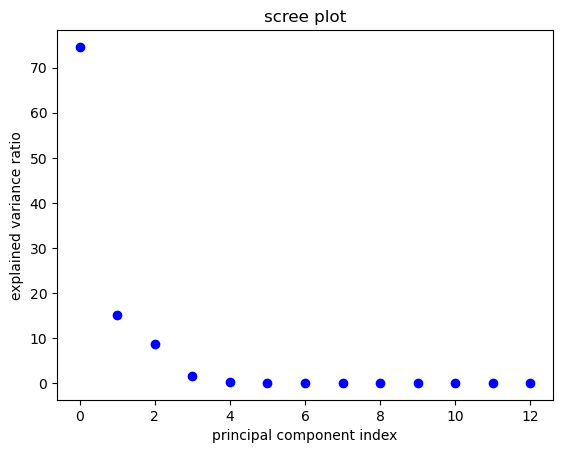

In [24]:
# plot the scree plot based on ratio

fig, ax = plt.subplots()
ax.scatter(range(len(pca.pcnt_var)),
           pca.pcnt_var,
           color='blue')
ax.set_xlabel("principal component index")
ax.set_ylabel("explained variance ratio")
ax.set_title("scree plot")
fig.show()

##### comments on PCA

Based on the two principle components that explain the most variance, there are not clear groupings. The no heart disease data does not show clear clustering from the heart disease data in the scores plot; although, the heart disease points do appear to be higher on PC2 than the no heart disease points. The scree plot shows that the first principal component accounts for more than 70% of the variance and the seconds more than 10% of the variance. 

###### Run data through Linear Regression and produce graphics

In [25]:
### read in data and drop ? fields
heart_disease = pd.read_csv("processed.cleveland.data",header=None)
heart_disease = heart_disease[heart_disease != "?"]
hd = heart_disease.dropna()
hd = hd.astype(float)

X = hd.iloc[:,0:13].values
y = hd.iloc[:,13].astype(int).values

for i in range(len(y)):
    if y[i] != 0:
        y[i] = 1

In [26]:
# test  
# Instantiate the model
model = MultivariateLinearRegression(learning_rate=0.01, num_iterations=1000)

# fit data to model and predict y values 
predictions = model.fit_predict(X,y)


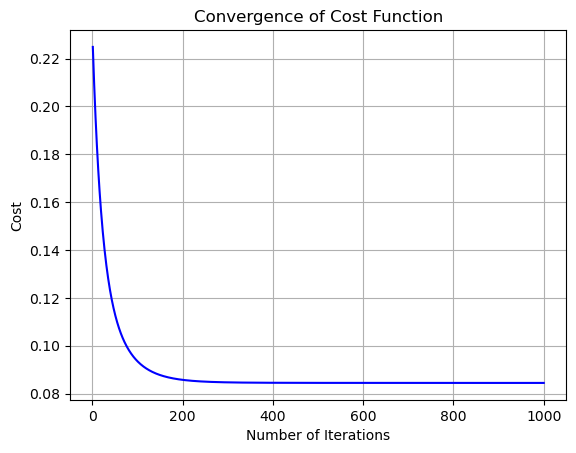

In [27]:
# plot cost v iterations
model.plot_convergence()

In [28]:
print(f"Weights: {abs(model.theta)}")
# strongest weights are 3: cp and 13: thal

Weights: [0.23063973 0.01055355 0.06815228 0.07984386 0.03755327 0.01832855
 0.03441061 0.03248466 0.05982743 0.06326273 0.0385345  0.0370985
 0.13371714 0.11733541]


#### Run data through logistic regression and produce graphics

In [29]:
### read in data and drop ? fields
heart_disease = pd.read_csv("processed.cleveland.data",header=None)
heart_disease = heart_disease[heart_disease != "?"]
hd = heart_disease.dropna()
hd = hd.astype(float)

X = hd.iloc[:,0:13].values
y = hd.iloc[:,13].astype(int).values

for i in range(len(y)):
    if y[i] != 0:
        y[i] = 1

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = MyLogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create an sklearn logistic regression model
skmodel = LogisticRegression(max_iter=100000)

# Train the sklearn model
skmodel.fit(X_train, y_train)

# Make sklearn predictions on the test set
y_pred_sk = skmodel.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
sk_accuracy = accuracy_score(y_test, y_pred)


Converged after 1408 iterations.


In [31]:
print(f"Our Accuracy:\t\t{accuracy}")
print(f"sklearn Accuracy:\t{sk_accuracy}\n")

print(f"Our Predicted:\n{y_pred}\n\nsklearn Predicted:\n{y_pred_sk}\n\nTest:\n{y_test}\n")

print(f"Weights: {abs(model.theta)}")
# strongest weights are 3: cp and 13: thal

Our Accuracy:		0.8833333333333333
sklearn Accuracy:	0.8833333333333333

Our Predicted:
[0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1]

sklearn Predicted:
[0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1]

Test:
[0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0]

Weights: [0.02870377 0.07408357 0.49271986 0.36742095 0.31587937 0.20455508
 0.2632427  0.19990802 0.38109771 0.40260712 0.37565679 0.17825651
 0.81377839 0.5726356 ]


##### comments on logistic regression

You can see above that our logistic regression model outputs the same level of accuracy as the sklearn model. You can see the predicted output from our model, the sklearn model, and the testing data. The predictions are very close to the real data and visually show that the model can predict the classification of data with a high accuracy. This tells us that the factors being observed are useful in predicting heart disease diagnosis

#### run data through ANN and produce graphics

In [32]:
### read in data and drop ? fields
heart_disease = pd.read_csv("processed.cleveland.data",header=None)
heart_disease = heart_disease[heart_disease != "?"]
hd = heart_disease.dropna()
hd = hd.astype(float)

X = hd.iloc[:,0:2].values
y = hd.iloc[:,13].astype(int).values

y = pd.DataFrame(y)
y = y.replace([2,3,4], 1)        
y = np.array(y)

# make a training and testing set of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# call our neural network class and train the data
nn = MyNeuralNetwork(x=X_train,y=np.array(y_train),learning_rate=0.1,iters=3000)
nn.train()

# produce predictions
y_pred_train = nn.predict(X_train).astype(int)
y_pred_test = nn.predict(X_test).astype(int)


# sklearn

# creating an classifier from the model:
mlp = MLPClassifier(solver='lbfgs', activation = 'logistic', alpha=1e-5, hidden_layer_sizes=(1), random_state=1)

# let's fit the training data to our model
mlp.fit(X_train, np.ravel(y_train))

y_pred_test_sk = mlp.predict(X_test)


# find accuracy scores from predicted and test data
print(f"Accuracy of sklearn model: {accuracy_score(y_pred_test_sk, y_test)* 100:.2f}%")
print(f"Accuracy of our model: {accuracy_score(y_pred_test, y_test)* 100:.2f}%")

# print the predicted and test data to compare
#print(f"Our Predicted:\n{y_pred_test}\n\nsklearn Predicted:\n{y_pred_test_sk}\n\nTest:\n{y_test}\n")

Accuracy of sklearn model: 63.33%
Accuracy of our model: 70.00%


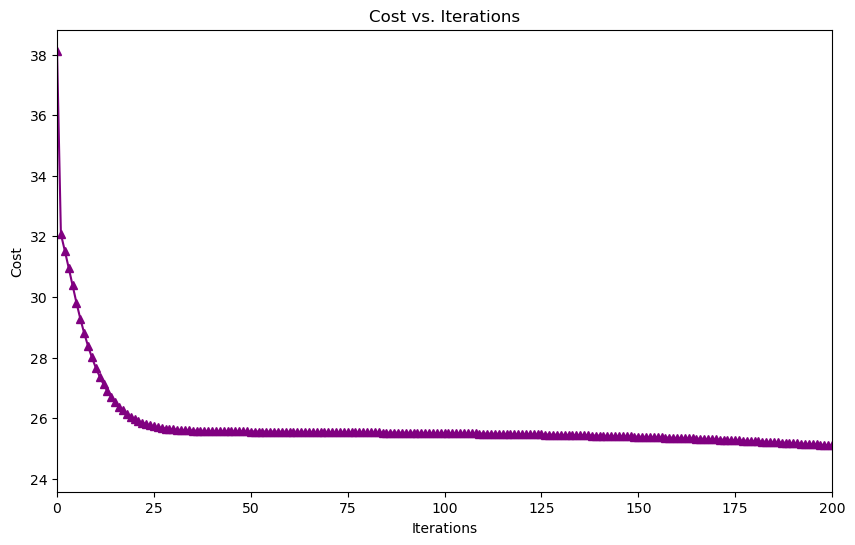

In [34]:
# plot cost vs. iterations
iters = []

for i in range(0, len(nn.cost)):
    iters.append(i)
    
plt.plot(iters, nn.cost, marker = '^', color = 'purple')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title("Cost vs. Iterations")
plt.xlim((0, 200))
plt.show()

##### comments on ANN

You can see above that our artificial neural network model outputs a decent level of accuracy. You can see the predicted output from our model and the testing data. The predictions are very close to the real data and visually show that the model can predict the classification of data with accuracy. This tells us that the factors being observed are useful in predicting heart disease diagnosis

#### kmeans and hierarchical clustering

##### visualize initial data

In [35]:
### read in data and drop ? fields
heart_disease = pd.read_csv("processed.cleveland.data",header=None)
heart_disease = heart_disease[heart_disease != "?"]
hd = heart_disease.dropna()
hd = hd.astype(float)

hd.columns = ['Age','Sex','Chest Pain','Resting BP','Cholesterol','Blood Sugar','Resting ECG','Max HR','Exercise Induced','ST depression','ST Segment','Major Vessels','thal','HD']



<AxesSubplot:xlabel='Age', ylabel='Resting BP'>

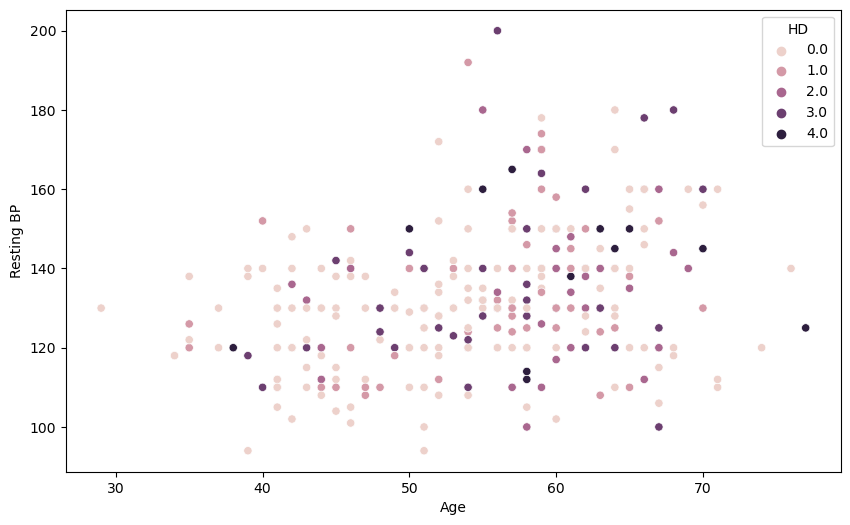

In [36]:
sns.scatterplot(data = hd, x = 'Age', y = 'Resting BP', hue = 'HD')

<AxesSubplot:>

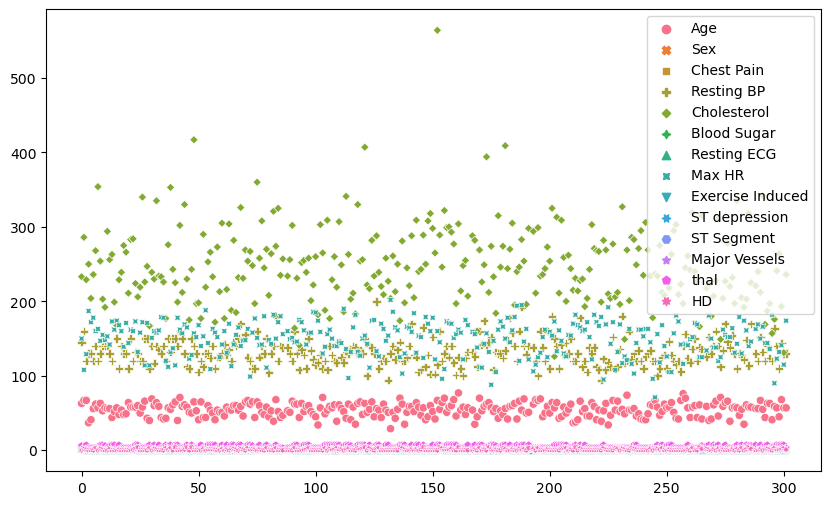

In [37]:
sns.scatterplot(data = hd)

##### kmeans

In [38]:
### read in data and drop ? fields
### add column headers
heart_disease = pd.read_csv("processed.cleveland.data",header=None)
heart_disease = heart_disease[heart_disease != "?"]
hd = heart_disease.dropna()
hd = hd.astype(float)

hd.columns = ['Age','Sex','Chest Pain','Resting BP','Cholesterol','Blood Sugar','Resting ECG','Max HR','Exercise Induced','ST depression','ST Segment','Major Vessels','thal','HD']

hd = hd[['Age','Resting BP','Cholesterol','HD']]
pd.to_numeric(hd['Age'])
pd.to_numeric(hd['Resting BP'])
pd.to_numeric(hd['Cholesterol'])
pd.to_numeric(hd['HD'])

0      0.0
1      2.0
2      1.0
3      0.0
4      0.0
      ... 
297    1.0
298    1.0
299    2.0
300    3.0
301    1.0
Name: HD, Length: 297, dtype: float64

In [39]:
#separate training data
X_train, X_test, y_train, y_test = train_test_split(hd[['Age', 'Resting BP']], hd[['HD']], test_size=0.33, random_state=0)

In [40]:
# standardize data
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [41]:
#kmeans clustering
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_train_norm)

KMeans(n_clusters=3)

In [42]:
# score
silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.5584044162341196

In [43]:
# find scores per k value
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0).fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<AxesSubplot:>

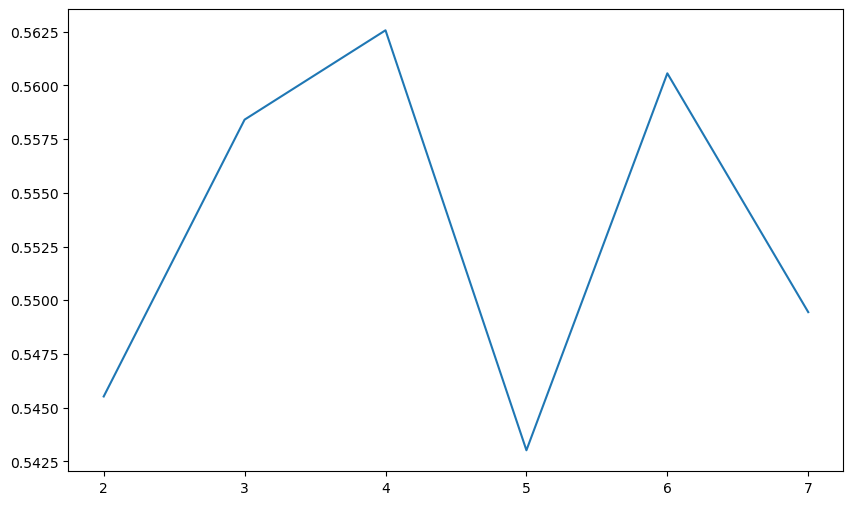

In [44]:
# find best k value
sns.lineplot(x = K, y = score)

<AxesSubplot:xlabel='Age', ylabel='Resting BP'>

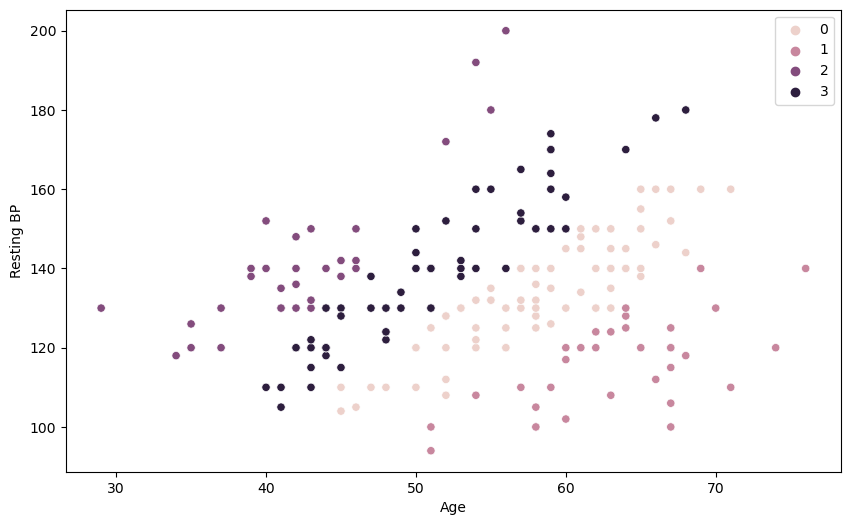

In [45]:
# plot clusters
sns.scatterplot(data = X_train, x = 'Age', y = 'Resting BP', hue = fits[2].labels_)

<AxesSubplot:ylabel='HD'>

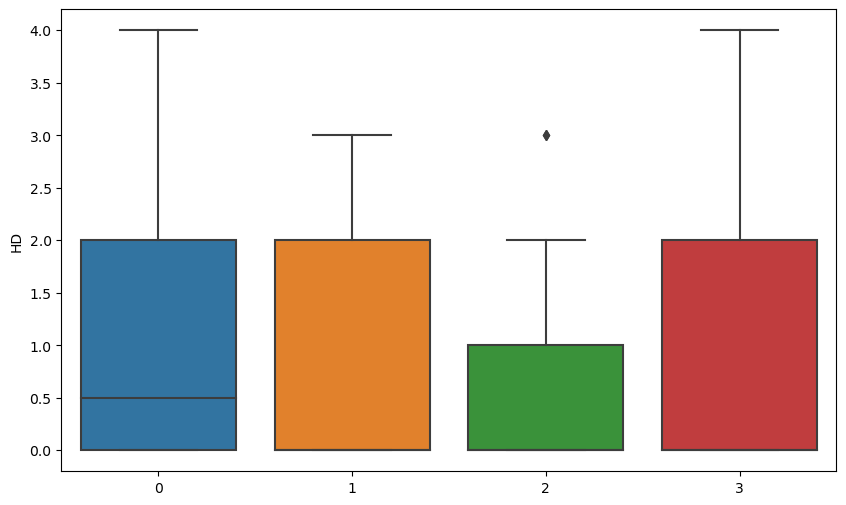

In [46]:
#boxplot clusters
sns.boxplot(x = fits[2].labels_, y = y_train['HD'])

##### comments on kmeans

Using the best fitted k of 4 for kmeans clustering gave us the above graphs. We can see on the boxplot that cluster 0 experiences the highest rates of heart disease, followed by cluster 3. In the scatterplot we see that cluster 0 represents the cluster with the highest ages but lowest Resting BP. Cluster 3 spans a wider age range and includes higher resting BP.

##### Hierarchical Clustering

In [47]:
### read in data and drop ? fields
heart_disease = pd.read_csv("processed.cleveland.data",header=None)
heart_disease = heart_disease[heart_disease != "?"]
hd = heart_disease.dropna()
hd = hd.astype(float)

hd.columns = ['Age','Sex','Chest Pain','Resting BP','Cholesterol','Blood Sugar','Resting ECG','Max HR','Exercise Induced','ST depression','ST Segment','Major Vessels','thal','HD']

hd = hd[['Age','Resting BP','Cholesterol','HD']]
pd.to_numeric(hd['Age'])
pd.to_numeric(hd['Resting BP'])
pd.to_numeric(hd['Cholesterol'])
pd.to_numeric(hd['HD'])

0      0.0
1      2.0
2      1.0
3      0.0
4      0.0
      ... 
297    1.0
298    1.0
299    2.0
300    3.0
301    1.0
Name: HD, Length: 297, dtype: float64

In [48]:
# separate training data
X_train, X_test, y_train, y_test = train_test_split(hd[['Age', 'Resting BP']], hd[['HD']], test_size=0.33, random_state=0)

In [49]:
# standardize data
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [50]:
# hierarchical clustering
clustering = AgglomerativeClustering(n_clusters = 3)
clustering.fit(X_train_norm)

AgglomerativeClustering(n_clusters=3)

In [51]:
# score
silhouette_score(X_train_norm, clustering.labels_, metric='euclidean')

0.5472180101510881

In [52]:
# scores per k value
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = AgglomerativeClustering(n_clusters = k).fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<AxesSubplot:>

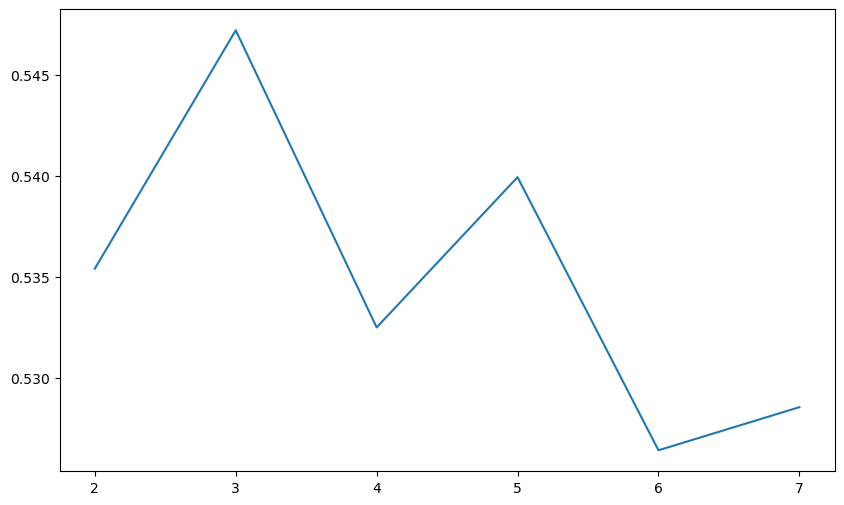

In [53]:
# find best k value based on scores
sns.lineplot(x = K, y = score)

In [ ]:
# plot clusters
sns.scatterplot(data = X_train, x = 'Age', y = 'Resting BP', hue = fits[1].labels_)

<AxesSubplot:xlabel='Age', ylabel='Resting BP'>

In [ ]:
# boxplot clusters
sns.boxplot(x = fits[1].labels_, y = y_train['HD'])

##### comments on hierarchical clustering

Using the best fitted k of 3 for hierarchical clustering gave us the above graphs. We can see on the boxplot that cluster 1 experiences the highest rates of heart disease, followed by cluster 2. In the scatterplot we see that cluster 1 represents the cluster in the mid range of both the ages and resting BP. Cluster 2 represents the highest ages.